In [1]:
#1. Import thư viện cần thiết
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import sklearn.preprocessing
import datetime
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [2]:
#2. Đọc dữ liệu từ file
df = pd.read_csv('/content/SAMSUNG.csv')

In [3]:
#3. Làm sạch dữ liệu
df['Open'] = df['Open'].replace(0, df['Open'].mean())
df['High'] = df['High'].replace(0, df['High'].mean())
df['Low'] = df['Low'].replace(0, df['Low'].mean())
df['Close'] = df['Close'].replace(0, df['Close'].mean())
df

,Date,Close,Open,High,Low
0,3/1/2019,44387.5,44500.0,45112.5,44012.5
1,3/2/2019,44387.5,44500.0,45112.5,44012.5
2,3/3/2019,44387.5,44500.0,45112.5,44012.5
3,3/4/2019,44850.0,46000.0,46100.0,44800.0
4,3/5/2019,44250.0,44600.0,45100.0,44150.0
...,...,...,...,...,...
1915,5/28/2024,77600.0,76500.0,78000.0,76200.0
1916,5/29/2024,75200.0,77700.0,78200.0,75200.0
1917,5/30/2024,73500.0,74800.0,75200.0,73500.0
1918,5/31/2024,73500.0,74500.0,74700.0,73500.0


In [4]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Chọn features và target
X = df[['Open', 'High', 'Low']]
y = df['Close']

train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Khởi tạo mô hình
model = XGBRegressor()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán kết quả trên tập train và tập test
train_predict = model.predict(X_train)
predictions_xgb = model.predict(X_test)

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Tính Mean Absolute Error
mae = mean_absolute_error(y_test, predictions_xgb)
print(f"Mean Absolute Error (MAE): {mae}")

# Tính Mean Squared Error
mse = mean_squared_error(y_test, predictions_xgb)
print(f"Mean Squared Error (MSE): {mse}")

# Tính R-squared
r2 = r2_score(y_test, predictions_xgb)
print(f"R-squared (R2): {r2}")

# Tính Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Tính Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, predictions_xgb)
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 336.95316572482636
Mean Squared Error (MSE): 209113.33388908606
R-squared (R2): 0.9948756623914669
Root Mean Squared Error (RMSE): 457.2891141160984
Mean Absolute Percentage Error (MAPE): 0.48656716999282484%


**Dự đoán 30 ngày tiếp theo**

In [6]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1

55069.7
4
1 day input [56000.         54500.         55069.69921875]
1 day output [54394.984]
2 day input [54500.         55069.69921875 54394.984375  ]
2 day output [54536.047]
3 day input [55069.69921875 54394.984375   54536.046875  ]
3 day output [54499.395]
4 day input [54394.984375   54536.046875   54499.39453125]
4 day output [54556.57]
5 day input [54536.046875   54499.39453125 54556.5703125 ]
5 day output [54543.094]
6 day input [54499.39453125 54556.5703125  54543.09375   ]
6 day output [54480.438]
7 day input [54556.5703125 54543.09375   54480.4375   ]
7 day output [54543.094]
8 day input [54543.09375 54480.4375  54543.09375]
8 day output [54543.094]
9 day input [54480.4375  54543.09375 54543.09375]
9 day output [54480.438]
10 day input [54543.09375 54543.09375 54480.4375 ]
10 day output [54543.094]
11 day input [54543.09375 54480.4375  54543.09375]
11 day output [54543.094]
12 day input [54480.4375  54543.09375 54543.09375]
12 day output [54480.438]
13 day input [54543.09375

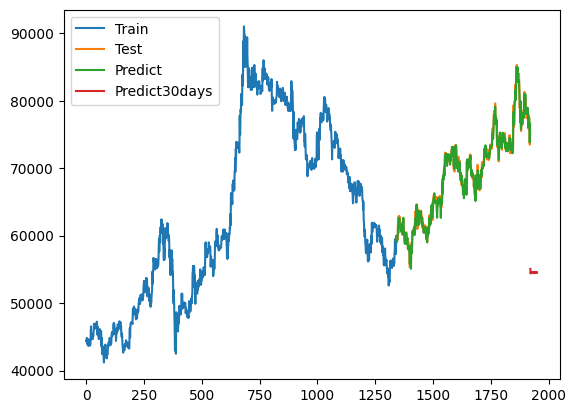

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output), step=1)
plt.plot(prediect_data_index, lst_output)

plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()

**Dự đoán 60 ngày tiếp theo**

In [8]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_60 = []
n_steps = 100
i = 0
while(i < 60):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[:3])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_60.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i = i + 1

55069.7
4
1 day input [55500. 56000. 54500.]
1 day output [55069.7]
2 day input [56000.         54500.         55069.69921875]
2 day output [54394.984]
3 day input [54500.         55069.69921875 55069.69921875]
3 day output [55103.902]
4 day input [55069.69921875 55069.69921875 54394.984375  ]
4 day output [54353.39]
5 day input [55069.69921875 54394.984375   55103.90234375]
5 day output [54599.582]
6 day input [54394.984375   55103.90234375 54353.390625  ]
6 day output [54762.203]
7 day input [55103.90234375 54353.390625   54599.58203125]
7 day output [54499.395]
8 day input [54353.390625   54599.58203125 54762.203125  ]
8 day output [54556.57]
9 day input [54599.58203125 54762.203125   54499.39453125]
9 day output [54897.85]
10 day input [54762.203125   54499.39453125 54556.5703125 ]
10 day output [54499.395]
11 day input [54499.39453125 54556.5703125  54897.8515625 ]
11 day output [54480.438]
12 day input [54556.5703125  54897.8515625  54499.39453125]
12 day output [55047.527]
13 da

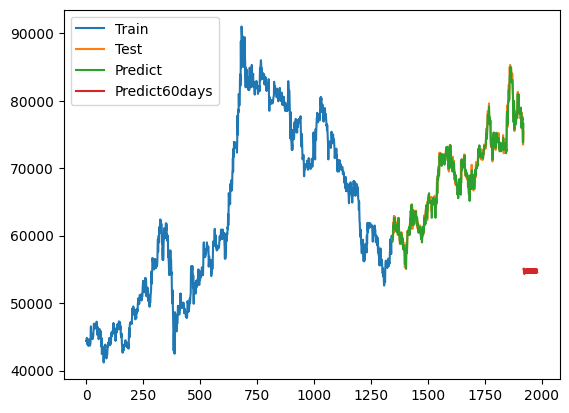

In [9]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_60), step=1)
plt.plot(prediect_data_index, lst_output_60)

plt.legend(['Train', 'Test', 'Predict', 'Predict60days'])
plt.show()

**Dự đoán 90 ngày tiếp theo**

In [10]:
import numpy as np

# Chuyển y_test thành NumPy array trước khi gọi reshape
x_input = X_test.iloc[60].to_numpy().reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = 100
i = 0
while(i < 90):

    if(len(temp_input) > 3):
        # Chỉ lấy 3 phần tử cuối cùng
        x_input = np.array(temp_input[-3:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, -1))
        # Dự đoán
        yhat = model.predict(x_input)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, -1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat.tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

55069.7
4
1 day input [56000.         54500.         55069.69921875]
1 day output [54394.984]
2 day input [54500.         55069.69921875 54394.984375  ]
2 day output [54536.047]
3 day input [55069.69921875 54394.984375   54536.046875  ]
3 day output [54499.395]
4 day input [54394.984375   54536.046875   54499.39453125]
4 day output [54556.57]
5 day input [54536.046875   54499.39453125 54556.5703125 ]
5 day output [54543.094]
6 day input [54499.39453125 54556.5703125  54543.09375   ]
6 day output [54480.438]
7 day input [54556.5703125 54543.09375   54480.4375   ]
7 day output [54543.094]
8 day input [54543.09375 54480.4375  54543.09375]
8 day output [54543.094]
9 day input [54480.4375  54543.09375 54543.09375]
9 day output [54480.438]
10 day input [54543.09375 54543.09375 54480.4375 ]
10 day output [54543.094]
11 day input [54543.09375 54480.4375  54543.09375]
11 day output [54543.094]
12 day input [54480.4375  54543.09375 54543.09375]
12 day output [54480.438]
13 day input [54543.09375

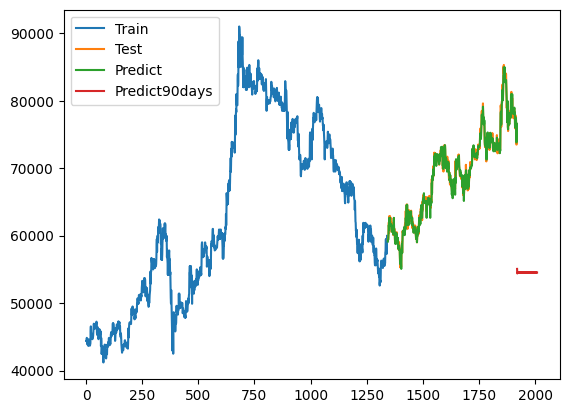

In [11]:
# Plotting
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data_index, y_train)

test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(y_test), step=1)
plt.plot(test_data_index, y_test)

# Adjusting y_pred to have correct shape and length
test_data_index_pred = pd.RangeIndex(start=train_size, stop=train_size + len(predictions_xgb), step=1)
plt.plot(test_data_index_pred, predictions_xgb)

# Adjusting lst_output_60 to have correct shape and length
prediect_data_index = pd.RangeIndex(start=len(df), stop=len(df) + len(lst_output_90), step=1)
plt.plot(prediect_data_index, lst_output_90)

plt.legend(['Train', 'Test', 'Predict', 'Predict90days'])
plt.show()